# Creating pre-clean dataset 

In [285]:
#importing all databases with Twitter data
from os import listdir
import pandas as pd 
path = r'./data' # use your path

filepaths = [f for f in listdir(".") if f.endswith('.csv')]
li = []

#reading all datasets
for filename in filepaths:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

database = pd.concat(li, axis=0, ignore_index=True)

In [286]:
database["company"].unique()

array([nan, 'US Bank', 'Truist', 'PNC Financial', 'Wells Fargo',
       'Twitter', 'HP', 'Dell', 'Uber', 'zappos', 'linkedin', 'github',
       'appletv', 'instagram', "Macy's", 'Nordstrom', "Kohl's", 'CVS',
       'J & J ', 'P&G ', 'Colgate-Palmolive', 'Walgreens',
       'General Mills', 'Coca-Cola', 'Ralph Lauren', 'Costco', 'TJX',
       'Home Depot', 'Walmart', 'Target', 'Lowes', 'Ross', 'Dollar tree',
       'Dollar General', 'Apple', 'Amazon', 'Facebook',
       'Alphabet (class A,C)', 'macbook', 'macos', 'airpods',
       'applewatch', 'apple', 'microsoftoffice', 'windows10', 'xbox',
       'microsoftsurface', 'iphone', 'AmericanAirlines', 'UnitedAirlines',
       'AlaskaAir', 'SpiritAir', 'Microsoft', 'Google', 'eBay', 'Lyft',
       'Snap', 'JPMorgan', 'BankofAmerica', 'WellsFargo', 'USBank',
       'Monster Beverage', 'Tyson Foods', 'Hershey', 'Kellog', 'Kroger',
       'Kraft Heinz', 'Smucker', 'Campbell Soup', 'Molson Coors',
       'Darden Restaurants', 'Snap Inc.', 'Spot

In [287]:
database.head(11)

,Company,Unnamed: 0,got_criteria,company,tweet_text,date,hashtags,retweets,favorites,mentions
0,amazonprime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,primevideo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,awscloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aws,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,amazonecho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,amazonalexa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,imdb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,twitch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,wholefoods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.0,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#Skol #us bank stadium. #itsmillertime. Go Vik...,2017-01-01 18:30:51+00:00,#Skol #us #itsmillertime,0.0,0.0,NaN


In [288]:
#columns in the dataset
for col in database.columns: 
    print(col) 

Company
Unnamed: 0
got_criteria
company
tweet_text
date
hashtags
retweets
favorites
mentions


In [289]:
#dropping NA
database = database[database.tweet_text != 'nan']
database.reset_index(drop=True,inplace=True)

In [290]:
#dropping NA
database = database[database.company != 'NaN']
database.reset_index(drop=True,inplace=True)

In [291]:
len(database["company"].unique())

80

In [292]:
#dropping unececessary columns
database = database.drop(columns = ["got_criteria", "Unnamed: 0"])

In [293]:
#head dataset
database.head(20)

,Company,company,tweet_text,date,hashtags,retweets,favorites,mentions
0,amazonprime,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,primevideo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,awscloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aws,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,amazonecho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,amazonalexa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,imdb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,twitch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,wholefoods,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,US Bank,#Skol #us bank stadium. #itsmillertime. Go Vik...,2017-01-01 18:30:51+00:00,#Skol #us #itsmillertime,0.0,0.0,NaN


In [294]:
#removing companies that are not prepared yet
database = database[database.company != 'US Bank']
database = database[database.company != 'J & J ']

database.reset_index(drop=True,inplace=True)

In [295]:
database = database.drop([0, 1,2,3,4,5,6,7,8,9])
database.reset_index(drop=True,inplace=True)

In [296]:
len(database["company"].unique())

77

In [297]:
#combining with three other dataframes to get: Brand company name, Sector, other name
#reading datsets
companies_dataset = pd.read_csv("./tables/companies.csv")
index_dataset = pd.read_csv("./tables/index_names.csv")

In [298]:
database = database.merge(index_dataset, on='company', how='left')


In [299]:
database = database.merge(companies_dataset, on='index', how='left')


In [300]:
database = database.rename(columns={"company": "hasthag","Company": "company_name", "index": "company_id", "datastart": "creation_year", "dataend": "public_year"})

In [301]:
industries_dataset = pd.read_csv("./tables/companies_industries.csv")
database = database.merge(industries_dataset, on='company_id', how='left')

In [306]:
#converting the twitter text to string
database["tweet_text"] = database["tweet_text"].apply(str) 

In [307]:
database

,Company_x,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,Company_y,location,district,creation_year,public_year,nuber,ticketname,stockindex,company_name,industry_id,industry_name
0,NaN,Truist,I'm tryna get that Official League license so ...,2017-02-10 02:36:53+00:00,#TRUIST,0.0,0.0,NaN,23,Truist Financial Corp.,Charlotte,NC,1872.0,1978.0,3,TFC,NYSE,Truist Financial Corp.,3,Consumer Banking
1,NaN,Truist,I'm tryna get that Official League license so ...,2017-02-10 02:36:53+00:00,#TRUIST,0.0,0.0,NaN,23,Truist Financial Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Truist Financial Corp.,3,Consumer Banking
2,NaN,Truist,I'm tryna get that Official League license so ...,2017-02-10 02:36:53+00:00,#TRUIST,0.0,0.0,NaN,23,Truist Financial Corp.,Charlotte,NC,1872.0,1978.0,3,TFC,NYSE,Truist Financial Corp.,3,Consumer Banking
3,NaN,Truist,I'm tryna get that Official League license so ...,2017-02-10 02:36:53+00:00,#TRUIST,0.0,0.0,NaN,23,Truist Financial Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Truist Financial Corp.,3,Consumer Banking
4,NaN,Truist,Showing up with some goods too. HMU. #TRUIST,2017-02-25 07:25:40+00:00,#TRUIST,1.0,2.0,NaN,23,Truist Financial Corp.,Charlotte,NC,1872.0,1978.0,3,TFC,NYSE,Truist Financial Corp.,3,Consumer Banking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478497,NaN,Bank of America,@BankofAmerica #bank of America.we were reques...,2020-03-18 10:45:58+00:00,#bank,0.0,0.0,@BankofAmerica,20,Bank of America,Charlotte,NC,1909.0,1978.0,3,BAC,NYSE,Bank of America,3,Consumer Banking
5478498,NaN,Bank of America,#Bank of America: Recession Is Already Here ht...,2020-03-19 18:06:49+00:00,#Bank,0.0,1.0,NaN,20,Bank of America,Charlotte,NC,1909.0,1978.0,3,BAC,NYSE,Bank of America,3,Consumer Banking
5478499,NaN,Bank of America,#Bank of America: Recession Is Already Here ht...,2020-03-19 18:06:49+00:00,#Bank,0.0,1.0,NaN,20,Bank of America,Charlotte,NC,1909.0,1978.0,3,BAC,NYSE,Bank of America,3,Consumer Banking
5478500,NaN,Bank of America,#Bank of America Corp. offers at least one #tr...,2020-03-19 07:00:00+00:00,#Bank #transgender,0.0,0.0,NaN,20,Bank of America,Charlotte,NC,1909.0,1978.0,3,BAC,NYSE,Bank of America,3,Consumer Banking


In [308]:
database = database.drop(columns = ["Company_y","Company_x", "nuber"])

In [309]:
#adding a column with length of text pre cleaning
database['pre_clean_len'] = [len(t) for t in database.tweet_text]

In [310]:
#first draft of the data dictionary for the dataset
from pprint import pprint
data_dict = {

    'text':{
        'type':database.tweet_text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':database.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':database.shape
}
pprint(data_dict)

{'dataset_shape': (5478502, 18),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


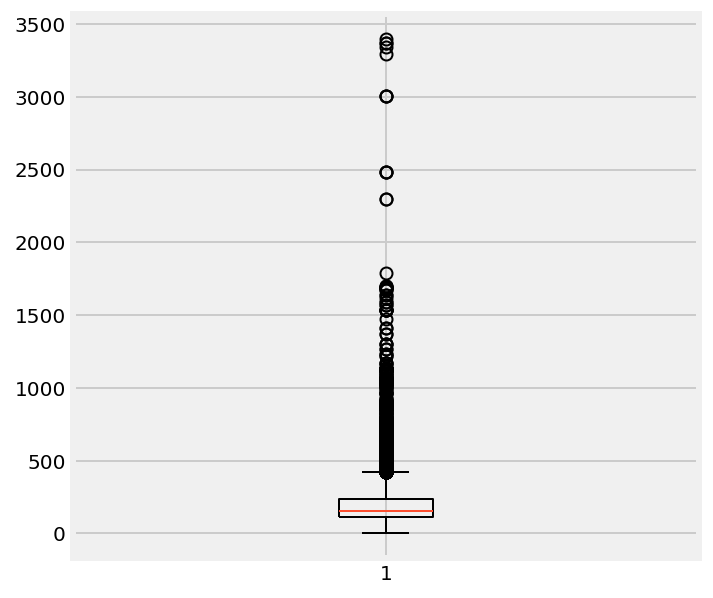

In [311]:
#boxplot of the length of tweet text
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(database.pre_clean_len)
plt.show()

There is a high dispersion in length of tweets. While the median is bellow 250, there are posts much lengthier.

In [312]:
database.tweet_text[database.pre_clean_len > 1000]

119006     We released an update for SUPER PINBALL MAKER!...
119007     We released an update for SUPER PINBALL MAKER!...
119008     We released an update for SUPER PINBALL MAKER!...
544374     https://www.amazon.com/KINGSLONG-Backpack-Comp...
544375     https://www.amazon.com/KINGSLONG-Backpack-Comp...
                                 ...                        
4081366    Today's #ebay find #MINI #MINIUK #ClassicMini ...
4294574    Middleton Home Tartan Plaid Christmas Tableclo...
4294575    Middleton Home Tartan Plaid Christmas Tableclo...
4294576    Middleton Home Tartan Plaid Christmas Tableclo...
4491570    Check out @kentspeakman #autographs @lettrs pu...
Name: tweet_text, Length: 129, dtype: object

In [313]:
len(database["tweet_text"])

5478502

It seems like there are comments that have websites on and others that are advertising products. Also, there seems to be some repeated comments. 

In [314]:
#removing duplicates from dataset
database = database.drop_duplicates(subset ="tweet_text", keep = "first") 
database.reset_index(drop=True,inplace=True)

In [316]:
database.tweet_text[database.pre_clean_len > 1000]

34207      We released an update for SUPER PINBALL MAKER!...
175893     https://www.amazon.com/KINGSLONG-Backpack-Comp...
175925     https://www.amazon.com/KINGSLONG-Backpack-Comp...
176099     https://www.amazon.com/KINGSLONG-Backpack-Comp...
176134     https://www.amazon.com/KINGSLONG-Backpack-Comp...
234999     Horrific, Life threatening experience in an UB...
285401     Getting ready for “Catch Me If You Cannes” 5K ...
299261     Most cited researcher with a #github account a...
337832     This seems handy!! “15 Git Hacks to Save your ...
438181     Follow Awesome authors on #Instagram for a cha...
488841     Here's what I've found $319 here can't vouch f...
593038     *SPECIAL BREAKING NEWS*- QL RADIO Will Be Feat...
629719     #VacancyCO #RealEstate, #PropertyPro.ng, #Lago...
629994     #VacancyCCO #Tripz Nigeria, #Lagos: #CUSTOMER ...
931287     #TARGET #UNKT These data are not final. Work i...
945373     I just entered to win a $100 #Target Gift card...
1095303    ENTER #Win a 

# Data Preparation 

## Cleaning the data

In [319]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

#removing @mentions
pat1 = r'@[A-Za-z0-9_]+'
#removing urls
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    #Decoding HTML to general text 
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        #BOM will be replaced with unicode unrecognisable special characters, then I can process this as “?”
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
        
    stripped = re.sub(combined_pat, '', bom_removed)
    
    stripped = re.sub(www_pat, '', stripped)
    
    lower_case = stripped.lower()
    
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    #removing hasthags, numbers
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()



test_result = []
for t in database["tweet_text"]:
    test_result.append(tweet_cleaner_updated(t))


In [320]:
database = database.reset_index()

print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(0, len (database['tweet_text'])):
    #if( (i+1)%10000 == 0 ):
        #print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                  
    clean_tweet_texts.append(tweet_cleaner_updated(database['tweet_text'][i]))

Cleaning and parsing the tweets...



In [321]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df

,text
0,tryna get that official league license so can ...
1,showing up with some goods too hmu truist
2,should drop some sfgiants inspired stuff with ...
3,check out truist skincare lotion infused moist...
4,designing truist is whole different animal than
...,...
2405396,bank of america bny mellon citigroup goldman s...
2405397,bank of america pledges million to fight healt...
2405398,large denomination bills were in such high dem...
2405399,bank of america we were request you to support...


## Exporting CSV file

In [322]:
#adding clean column to initial dataset
database["clean_text"] = clean_df["text"]
database['hasthag'] = database['hasthag'].str.lower()
database = database.drop_duplicates(subset ="clean_text", keep = "first") 
database['clean_length'] = [len(t) for t in database.clean_text]


In [325]:
#removing rows with very short length
database = database[database['clean_length'] > 10]

In [279]:
len(database["hasthag"].unique())

72

In [327]:
database.to_csv('./clean_tweet.csv',encoding='utf-8')

# Raw Data Statistics

In [328]:
#first draft of the data dictionary for the dataset
from pprint import pprint
data_dict = {

    'text':{
        'type':database.clean_text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':database.clean_text.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':database.shape
}
pprint(data_dict)

{'dataset_shape': (2291983, 21),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('O')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


In [330]:
len(database["hasthag"].unique())

76

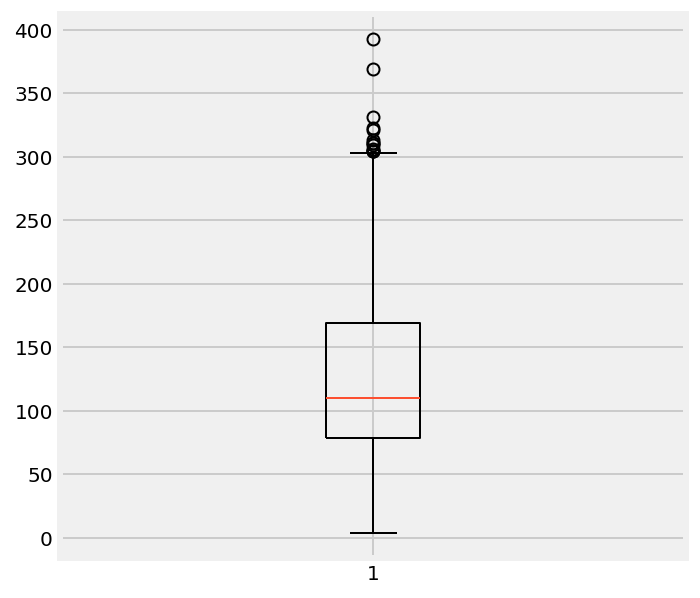

In [119]:
#boxplot of the length of tweet text
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(database.clean_length)
plt.show()

In [349]:
#statistics of the length
database.describe()

,index,retweets,favorites,company_id,creation_year,public_year,industry_id,pre_clean_len,clean_length
count,2.291983e+06,2.291983e+06,2.291983e+06,2.291983e+06,1.448330e+06,1.448330e+06,2.291983e+06,2.291983e+06,2.291983e+06
mean,1.203464e+06,9.193935e+00,2.361418e+01,2.248031e+01,1.960875e+03,1.952904e+03,3.317321e+00,1.700259e+02,1.247448e+02
std,6.945666e+05,2.444840e+02,7.716652e+02,2.790626e+01,4.968467e+01,2.551812e+02,3.661046e+00,7.832441e+01,6.188559e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.799000e+03,1.600000e+01,1.000000e+00,1.100000e+01,1.100000e+01
25%,6.006025e+05,0.000000e+00,0.000000e+00,2.000000e+00,1.963000e+03,1.980000e+03,1.000000e+00,1.120000e+02,7.700000e+01
50%,1.202059e+06,1.000000e+00,3.000000e+00,9.000000e+00,1.976000e+03,1.984000e+03,1.000000e+00,1.520000e+02,1.090000e+02
75%,1.804166e+06,4.000000e+00,9.000000e+00,4.600000e+01,1.983000e+03,1.986000e+03,7.000000e+00,2.350000e+02,1.710000e+02
max,2.405400e+06,1.392800e+05,4.621190e+05,1.170000e+02,2.011000e+03,2.018000e+03,1.500000e+01,3.399000e+03,4.050000e+02


#### Raw Database statistics

In [332]:
database.groupby(['company_name']).agg(['mean', 'count', "max", "min"])["index"]


,mean,count,max,min
company_name,,,,
AT&T Inc.,2.271173e+06,80231,2312393,2229629
"Alaska Air Group, Inc.",1.728298e+06,6198,1731479,1725079
Alphabet Inc,1.831398e+06,70997,1868718,1271092
"Amazon.com, Inc.",1.091604e+06,99100,1188340,240751
"American Airlines, Inc.",1.660133e+06,45632,1683174,1637065
Apple Inc.,1.231840e+06,321803,1637064,347372
Bank of America,2.103092e+06,18643,2405400,2055454
"Best Buy Co., Inc.",1.009936e+06,497,1010202,1009653
CVS Health Corporation,6.312639e+05,30938,647647,614661


In [345]:
#statistics per sector
database[["clean_length", "industry_name", "retweets", "favorites"]].groupby(['industry_name']).agg(['mean', 'count', "max", "min"])


clean_length                     retweets           \
                           mean    count  max min       mean    count   
industry_name                                                           
Airlines             135.156373    93475  321  13   3.102776    93475   
Clothing & Apparel    98.983131     1482  275  18   0.209177     1482   
Consumer Banking     127.939401    84407  303  11   1.571303    84407   
Food & Beverages     120.157252    84126  303  11  27.229774    84126   
Pharmacy & Drugs     116.579254   117634  302  11   3.802855   117634   
Phone Carriers       119.453977   161669  311  11  14.242774   161669   
Restaurants          135.216561      471  275  12   0.522293      471   
Retail               117.030210   360672  405  11   6.138225   360672   
Technology           127.464214  1388047  343  11   9.649923  1388047   

                                   favorites                          
                         max  min       mean    count       max  min  
industry_name                                                         
Airlines             12980.0  0.0   6.296732    93475   17098.0  0.0  
Clothing & Apparel      11.0  0.0   0.367746     1482      80.0  0.0  
Consumer Banking      8994.0  0.0   3.116779    84407   17428.0  0.0  
Food & Beverages     51799.0  0.0  81.465338    84126  144825.0  0.0  
Pharmacy & Drugs     80700.0  0.0   8.500383   117634   34120.0  0.0  
Phone Carriers       25921.0  0.0  45.640809   161669  147982.0  0.0  
Restaurants             36.0  0.0   1.339703      471      94.0  0.0  
Retail               44562.0  0.0  25.262998   360672  224660.0  0.0  
Technology          139280.0  0.0  20.839931  1388047  462119.0  0.0

In [347]:
database[["company_name", "industry_name"]].groupby(['industry_name']).agg(['count', "min", "max"])

company_name                                 \
                          count                            min   
industry_name                                                    
Airlines                  93475         Alaska Air Group, Inc.   
Clothing & Apparel         1482             Levi Strauss & Co.   
Consumer Banking          84407                Bank of America   
Food & Beverages          84126  Molson Coors Beverage Company   
Pharmacy & Drugs         117634         CVS Health Corporation   
Phone Carriers           161669                      AT&T Inc.   
Restaurants                 471       Darden Restaurants, Inc.   
Retail                   360672             Best Buy Co., Inc.   
Technology              1388047                   Alphabet Inc   

                                                    
                                               max  
industry_name                                       
Airlines            United Airlines Holdings, Inc.  
Clothing & Apparel              Levi Strauss & Co.  
Consumer Banking             Wells Fargo & Company  
Food & Beverages                 Tyson Foods, Inc.  
Pharmacy & Drugs    Walgreens Boots Alliance, Inc.  
Phone Carriers         Verizon Communications Inc.  
Restaurants                    The Wendy's Company  
Retail                                Walmart Inc.  
Technology                               eBay Inc.

In [340]:
data = database[["company_name", "industry_name"]].groupby(['company_name']).agg(['count'])

In [344]:
data.describe()

,industry_name
,count
count,53.000000
mean,43244.962264
std,61007.368534
min,125.000000
25%,3972.000000
50%,27145.000000
75%,51581.000000
max,321803.000000
